In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import awkward as ak
import uproot 
import mplhep as hep
import hist
import os

from UtilityAndConst import *
from Functions import *

dir = "/Users/francescolarovere/Documents/Tesi-Triennale/Dati"
os.chdir(dir)

hep.style.use("CMS")
np.set_printoptions(threshold=np.inf)

In [2]:
#Importing file

LS133 = "./ntupleStubsBmtfGmt_LS133.root"
LS263 = "./ntupleStubsBmtfGmt_LS263.root"
LS264 = "./ntupleStubsBmtfGmt_LS264.root"
LS306 = "./ntupleStubsBmtfGmt_LS306.root"

#Open file
bmtf_awk_LS133 = OpenRootFile(LS133, bmtf_features)
bmtf_awk_LS263 = OpenRootFile(LS263, bmtf_features)
bmtf_awk_LS264 = OpenRootFile(LS264, bmtf_features)
bmtf_awk_LS306 = OpenRootFile(LS306, bmtf_features)

stubs_awk_LS133 = OpenRootFile(LS133, stub_features)
stubs_awk_LS263 = OpenRootFile(LS263, stub_features)
stubs_awk_LS264 = OpenRootFile(LS264, stub_features)
stubs_awk_LS306 = OpenRootFile(LS306, stub_features)


#Caricamenot BX delle stubs
BX_LS133 = stubs_awk_LS133.bx
BX_LS263 = stubs_awk_LS263.bx
BX_LS264 = stubs_awk_LS264.bx
BX_LS306 = stubs_awk_LS306.bx

#Caricamento informazioni sulle stubs che possono contenere candidati muoni 
nBmtfMuons_LS133 = bmtf_awk_LS133.nBmtfMuons
nBmtfMuons_LS263 = bmtf_awk_LS263.nBmtfMuons
nBmtfMuons_LS264 = bmtf_awk_LS264.nBmtfMuons
nBmtfMuons_LS306 = bmtf_awk_LS306.nBmtfMuons

In [3]:
bx_range = np.arange(ONE_ORBIT_IN_BX + 2)

bx_bmtf_counts_LS133 = np.bincount(BX_LS133, weights=nBmtfMuons_LS133)
bx_bmtf_counts_LS263 = np.bincount(BX_LS263, weights=nBmtfMuons_LS263)
bx_bmtf_counts_LS264 = np.bincount(BX_LS264, weights=nBmtfMuons_LS264)
bx_bmtf_counts_LS306 = np.bincount(BX_LS306, weights=nBmtfMuons_LS306)

bx_bmtf_counts = bx_bmtf_counts_LS133 + bx_bmtf_counts_LS263 + bx_bmtf_counts_LS264 + bx_bmtf_counts_LS306

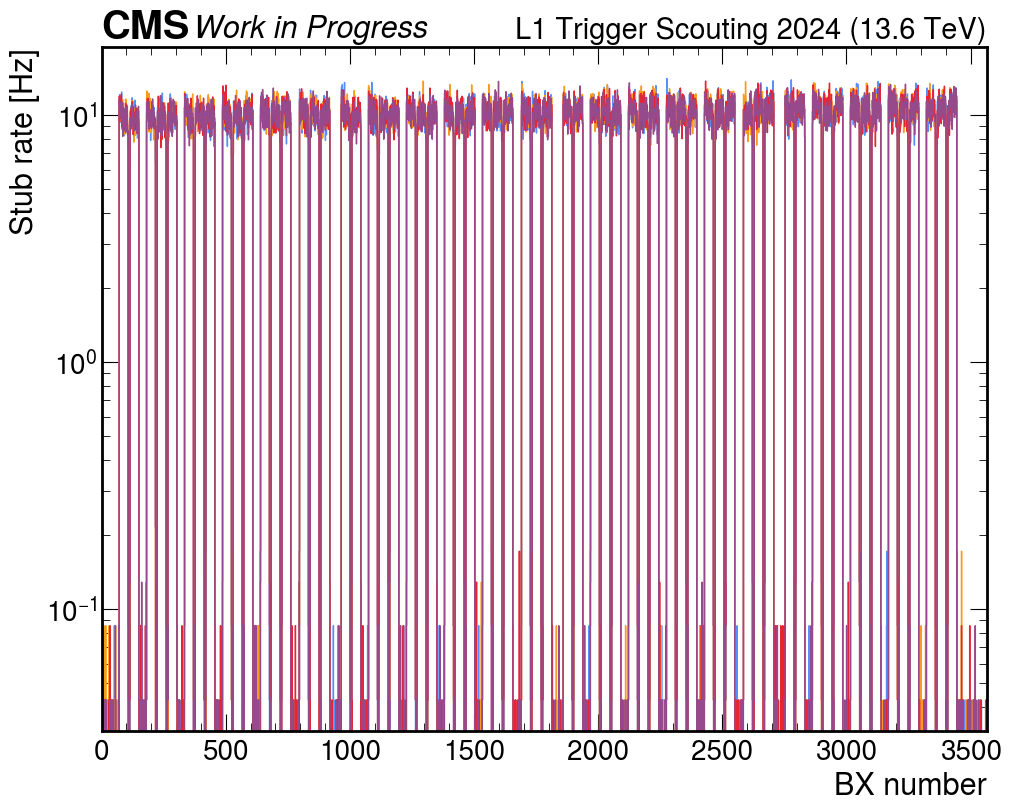

In [4]:
#Plot con tutti e quattro i file separati per verificare inconsistenze
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_bmtf_counts_LS133), histtype='step')
ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_bmtf_counts_LS263), histtype='step')
ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_bmtf_counts_LS264), histtype='step')
ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_bmtf_counts_LS306), histtype='step')


ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(0, ONE_ORBIT_IN_BX)
ax.set_yscale('log')

plt.show()

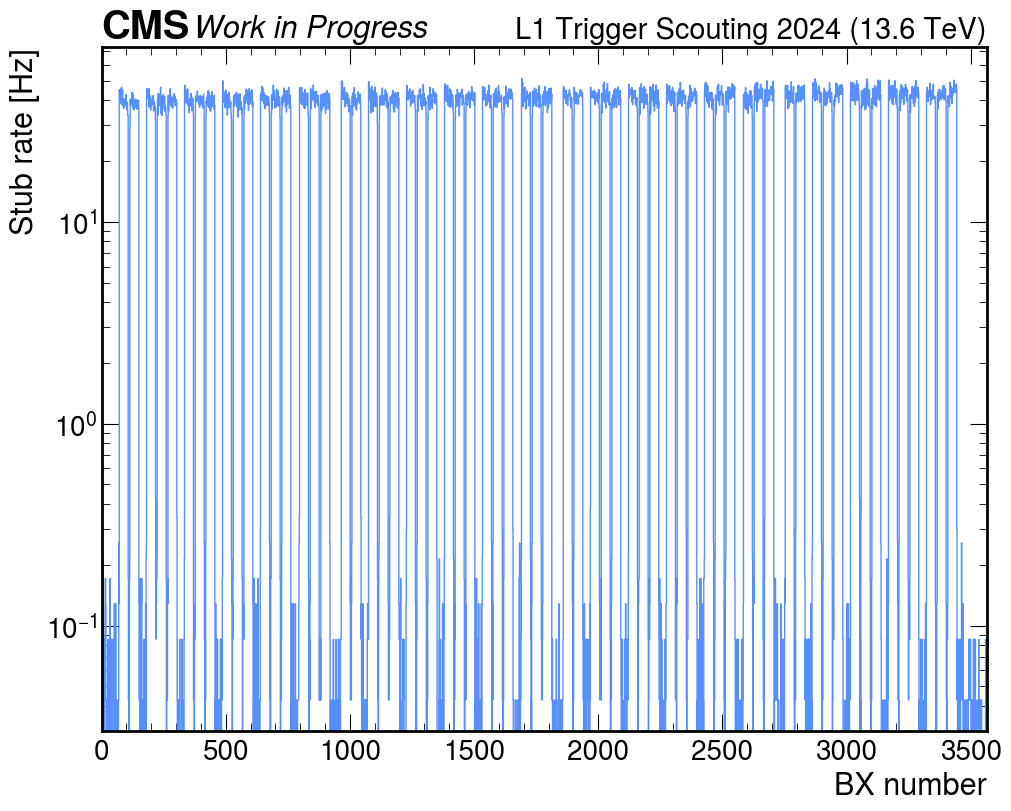

In [5]:
#Plot con i quattro file uniti
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(bx_range[:-1], bins=bx_range, weights=ConvertToHz(bx_bmtf_counts), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(0, ONE_ORBIT_IN_BX)
ax.set_yscale('log')

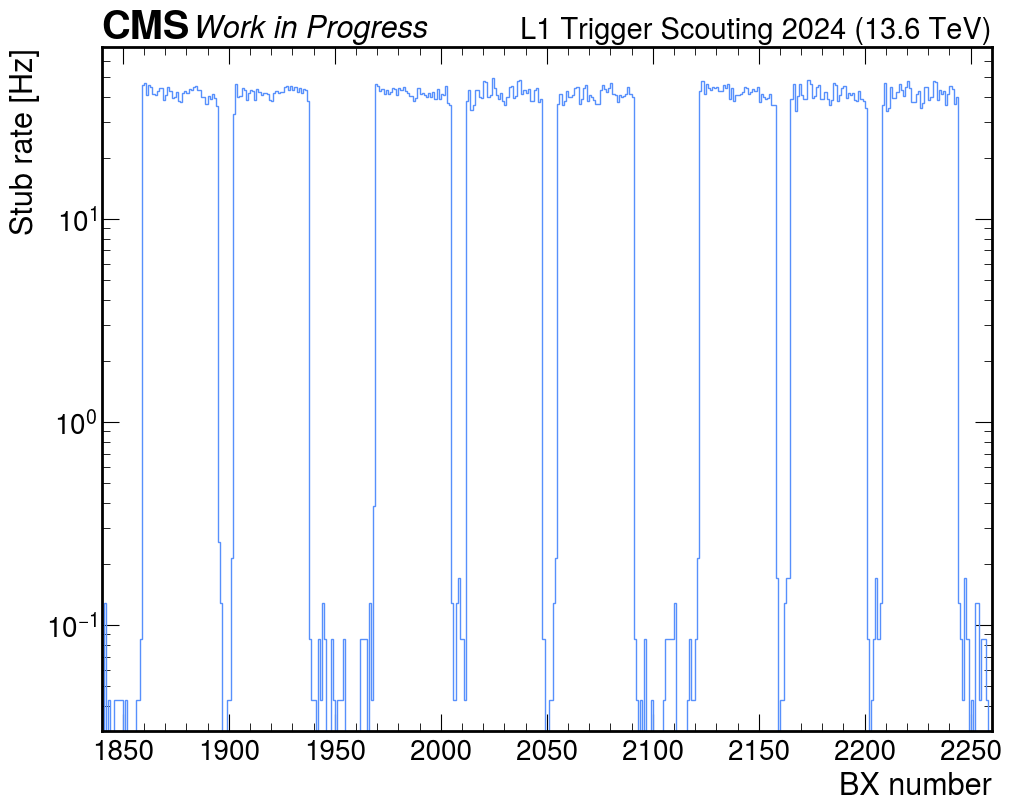

In [6]:
#Zoom dei quattro file uniti
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

bx_left = 1840
bx_right = 2260

ax.hist(bx_range[bx_left:bx_right], bins=bx_range[bx_left:bx_right+1], weights=ConvertToHz(bx_bmtf_counts[bx_left:bx_right]), histtype='step')

ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(bx_left, bx_right)
ax.set_yscale('log')

# Molteplicità per bx e per orbit

In [7]:
nBmtfLS133_count = ConvertToHz(np.bincount(nBmtfMuons_LS133))
nBmtfLS263_count = ConvertToHz(np.bincount(nBmtfMuons_LS263))
nBmtfLS264_count = ConvertToHz(np.bincount(nBmtfMuons_LS264))
nBmtfLS306_count = ConvertToHz(np.bincount(nBmtfMuons_LS306))

nBmtf_Array = ak.Array([nBmtfLS133_count, nBmtfLS263_count, nBmtfLS264_count, nBmtfLS306_count])

MaxStubs = max(len(nBmtf_Array[0]), len(nBmtf_Array[1]), len(nBmtf_Array[2]), len(nBmtf_Array[3]))

#Filled Array per eseguire una somma vettoriale dei 4 array
FnBmtfLS133 = ak.fill_none(ak.pad_none(nBmtf_Array[0], MaxStubs, axis = 0, clip=True), 0)
FnBmtfLS263 = ak.fill_none(ak.pad_none(nBmtf_Array[1], MaxStubs, axis = 0, clip=True), 0)
FnBmtfLS264 = ak.fill_none(ak.pad_none(nBmtf_Array[2], MaxStubs, axis = 0, clip=True), 0)
FnBmtfLS306 = ak.fill_none(ak.pad_none(nBmtf_Array[3], MaxStubs, axis = 0, clip=True), 0)

nBmtf = FnBmtfLS133 + FnBmtfLS263 + FnBmtfLS264 + FnBmtfLS306
print(nBmtf[1:])

[8.35e+04, 6.39e+03, 157, 7.62, 0.171, 0.0428]


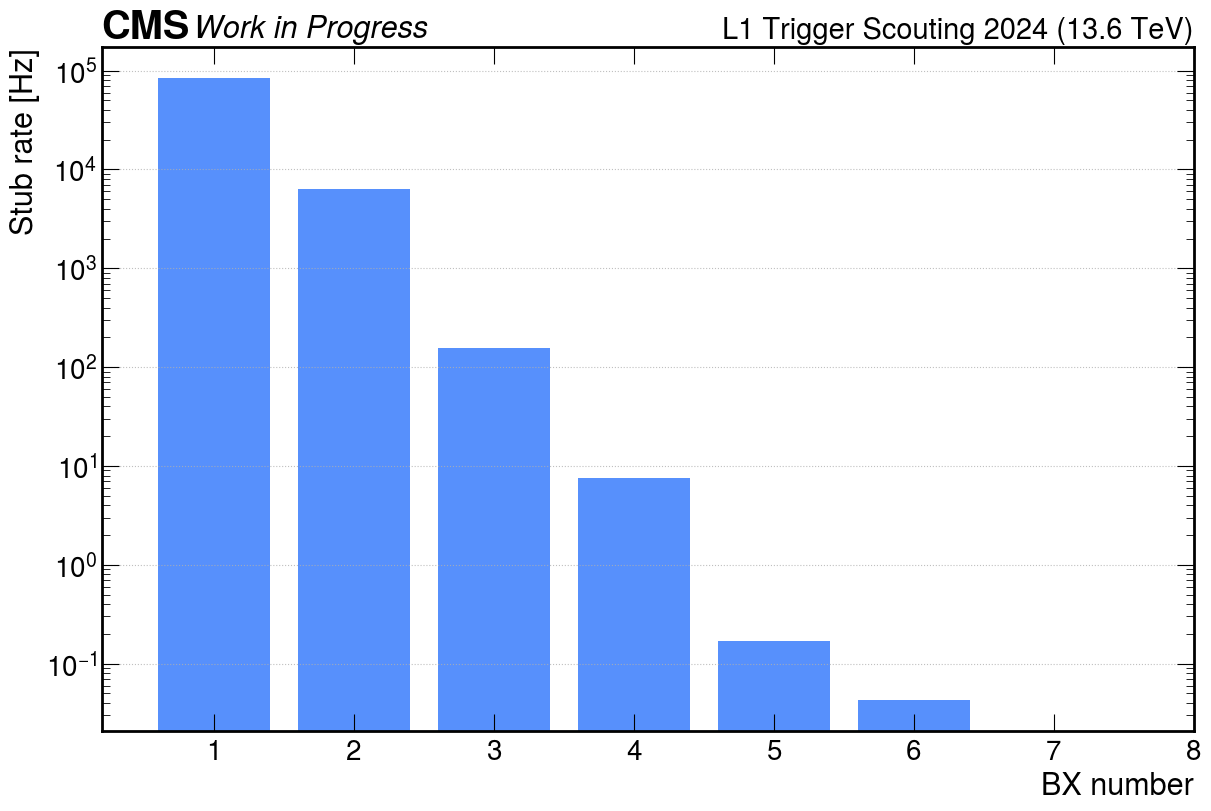

In [8]:
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.bar(np.arange(len(nBmtf[1:])), nBmtf[1:])

ax.set_xticks(ticks=np.arange(9), labels=np.arange(1, 10, 1))
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('BX number')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(-0.8, 7)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

In [9]:
#Calcola le stubs per orbit, tempo di compilazione 4 minuti 
'''
BmtfPerOrbitLS133 = StubsPerOrbit(BX_LS133, nBmtfMuons_LS133)
BmtfPerOrbitLS263 = StubsPerOrbit(BX_LS263, nBmtfMuons_LS263)
BmtfPerOrbitLS264 = StubsPerOrbit(BX_LS264, nBmtfMuons_LS264)
BmtfPerOrbitLS306 = StubsPerOrbit(BX_LS306, nBmtfMuons_LS306)
'''

'\nBmtfPerOrbitLS133 = StubsPerOrbit(BX_LS133, nBmtfMuons_LS133)\nBmtfPerOrbitLS263 = StubsPerOrbit(BX_LS263, nBmtfMuons_LS263)\nBmtfPerOrbitLS264 = StubsPerOrbit(BX_LS264, nBmtfMuons_LS264)\nBmtfPerOrbitLS306 = StubsPerOrbit(BX_LS306, nBmtfMuons_LS306)\n'

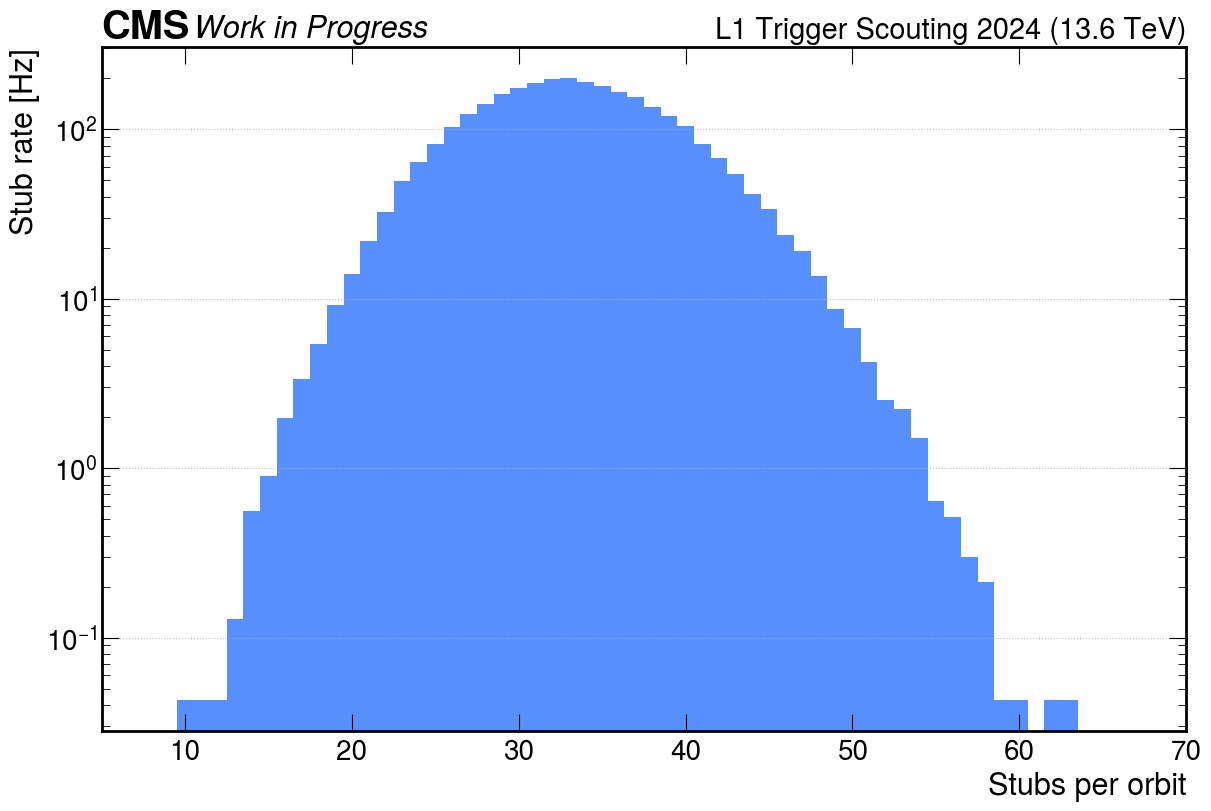

In [10]:
BmtfPerOrbit = ConvertToHz(BmtfPerOrbitLS133 + BmtfPerOrbitLS263 + BmtfPerOrbitLS264 + BmtfPerOrbitLS306)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.bar(np.arange(1, len(BmtfPerOrbit) + 1), BmtfPerOrbit, width=1)


#ax.set_xticks(ticks=np.arange(20), labels=np.arange(0, 20, 1))
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xlabel('Stubs per orbit')
ax.set_ylabel('Stub rate [Hz]')
ax.set_xlim(5, 70)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

# Momenti Constrained and Unconstrained 

In [11]:
#Caricamento elementi Constrained e Unconstrained in Gev/c
bmtfPtLS133 = ak.flatten(bmtf_awk_LS133.bmtfPt)
bmtfPtLS263 = ak.flatten(bmtf_awk_LS263.bmtfPt)
bmtfPtLS264 = ak.flatten(bmtf_awk_LS264.bmtfPt)
bmtfPtLS306 = ak.flatten(bmtf_awk_LS306.bmtfPt)


bmtfPtuLS133 = ak.flatten(bmtf_awk_LS133.bmtfPtu)
bmtfPtuLS263 = ak.flatten(bmtf_awk_LS263.bmtfPtu)
bmtfPtuLS264 = ak.flatten(bmtf_awk_LS264.bmtfPtu)
bmtfPtuLS306 = ak.flatten(bmtf_awk_LS306.bmtfPtu)

Pt = ak.concatenate([bmtfPtLS133, bmtfPtLS263, bmtfPtLS264, bmtfPtLS306])
Ptu = ak.concatenate([bmtfPtuLS133, bmtfPtuLS263, bmtfPtuLS264, bmtfPtuLS306])


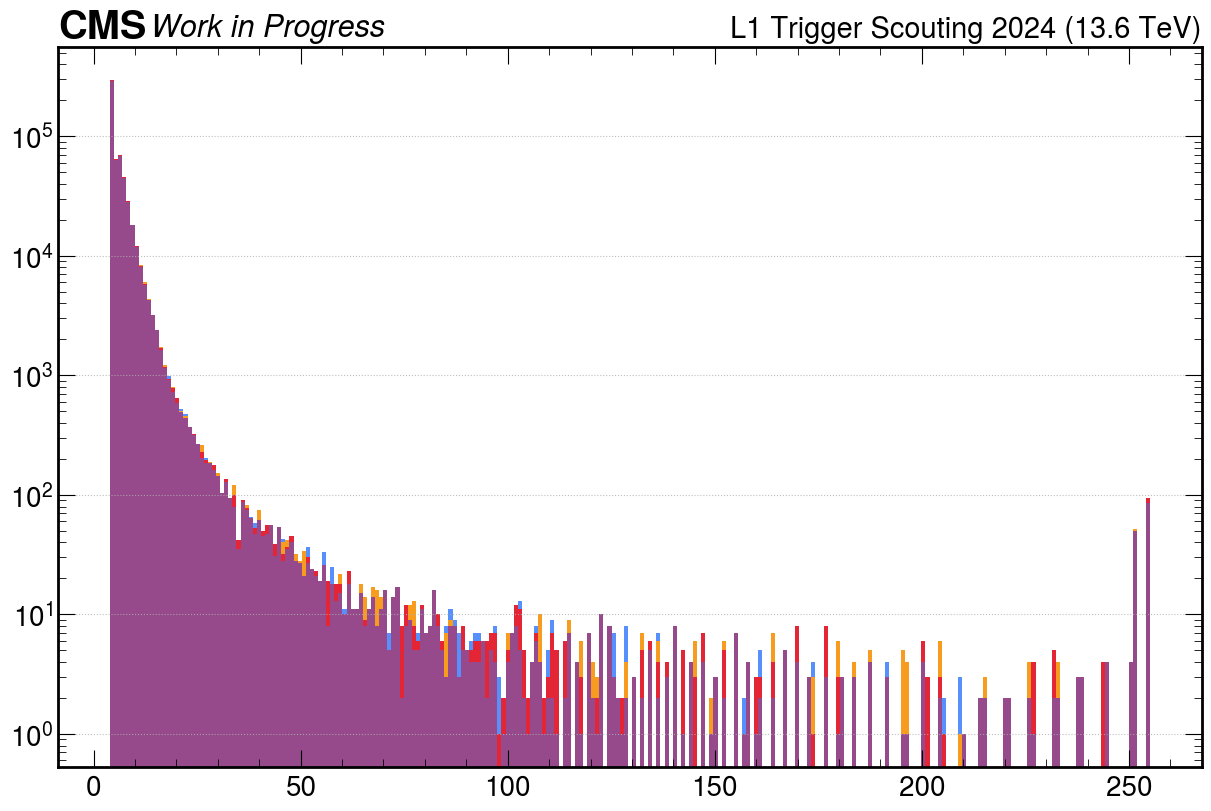

In [12]:
#Verifico che i dati siano coerenti, sia per Pt che per Ptu
fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(bmtfPtLS133, bins = int(np.max(bmtfPtLS133)))
ax.hist(bmtfPtLS263, bins = int(np.max(bmtfPtLS263)))
ax.hist(bmtfPtLS264, bins = int(np.max(bmtfPtLS264)))
ax.hist(bmtfPtLS306, bins = int(np.max(bmtfPtLS306)))


#ax.set_xlabel('BX number')
#ax.set_ylabel('Stub rate [Hz]')
#ax.set_xlim(0, 20)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

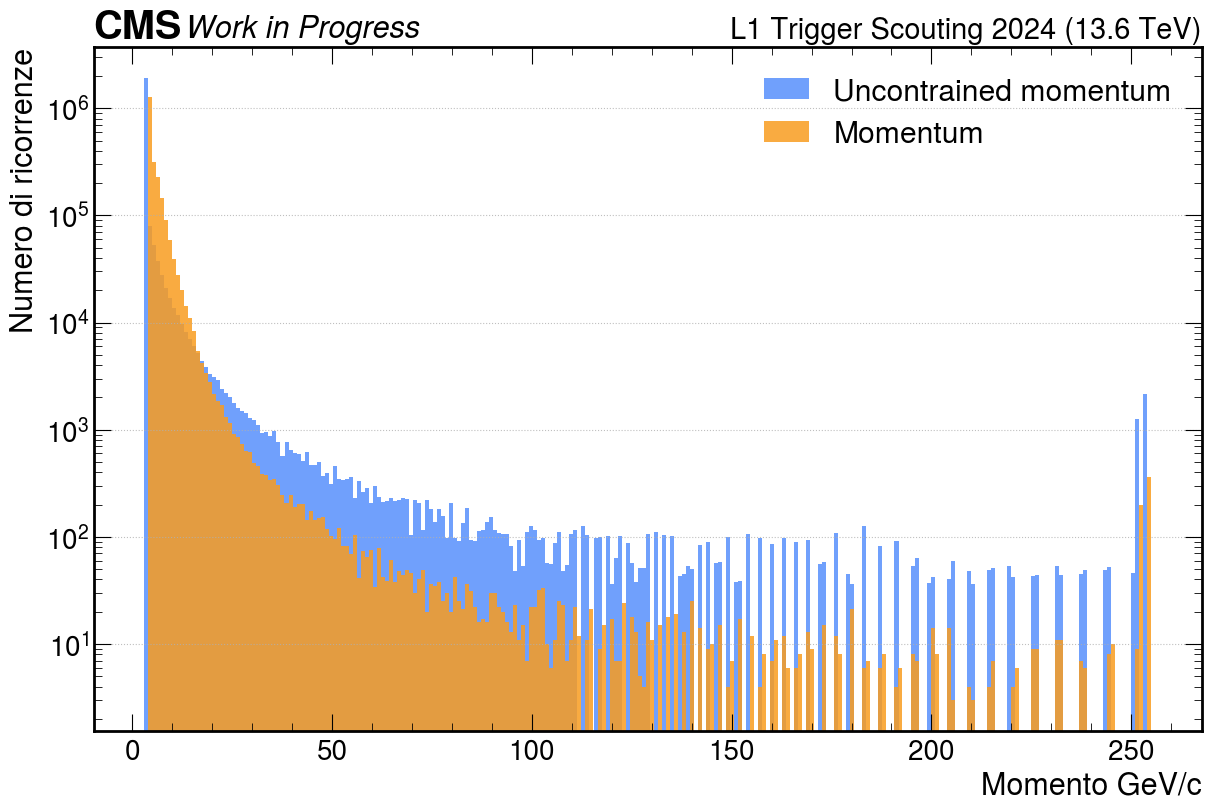

In [13]:
'''DA CONTROLLARE, NON NE SONO SICURO '''
#Plot di Pt e Ptu uniti

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True)

set_label_font(ax, FONTSIZE)
set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(Ptu, bins = 250, alpha = 0.85, label='Uncontrained momentum')
ax.hist(Pt, bins = 250, alpha = 0.85, label='Momentum')

ax.set_xlabel('Momento GeV/c')
ax.set_ylabel('Numero di ricorrenze')
ax.legend()
#ax.set_xlim(0, 50)
#ax.set_ylim(0, 1000)
ax.grid(visible=True, axis='y')
ax.set_yscale('log')

# Controllo della carica e degli eventi non validi

Gli eventi non validi sono quelli che hanno carica incerta, probabilmente causato dalla velocità elevata 

In [14]:
BmtfSignLS133 = ak.flatten(bmtf_awk_LS133.bmtfHwSign)
BmtfSignLS263 = ak.flatten(bmtf_awk_LS263.bmtfHwSign)
BmtfSignLS264 = ak.flatten(bmtf_awk_LS264.bmtfHwSign)
BmtfSignLS306 = ak.flatten(bmtf_awk_LS306.bmtfHwSign)

#Assumo che 0 sia carica positiva e 1 sia carica negativa. Ma non posso esserne sicuro

BmtfSign = np.bincount(ak.concatenate([BmtfSignLS133, BmtfSignLS263, BmtfSignLS264, BmtfSignLS306]))

BmtfSignValidLS133 = ak.flatten(bmtf_awk_LS133.bmtfHwSignValid)
BmtfSignValidLS263 = ak.flatten(bmtf_awk_LS263.bmtfHwSignValid)
BmtfSignValidLS264 = ak.flatten(bmtf_awk_LS264.bmtfHwSignValid)
BmtfSignValidLS306 = ak.flatten(bmtf_awk_LS306.bmtfHwSignValid)

BmtfSignValid = np.bincount(ak.concatenate([BmtfSignValidLS133, BmtfSignValidLS263, BmtfSignValidLS264, BmtfSignValidLS306]))


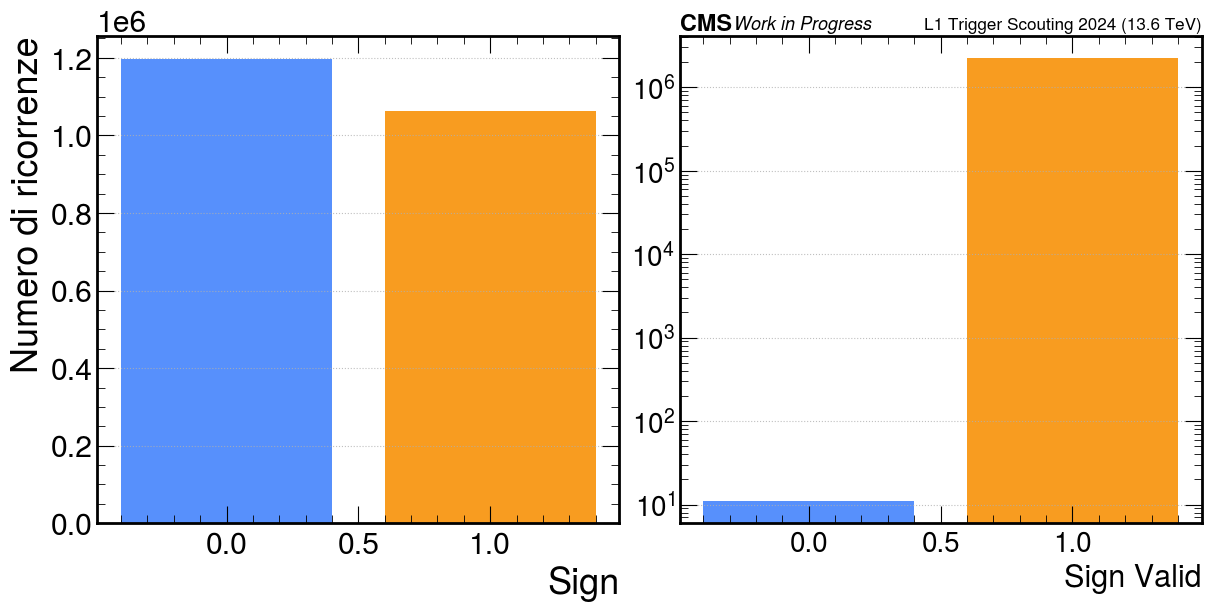

In [15]:

fig, ax = plt.subplots(1, 2, figsize=(12, 6), constrained_layout=True)

axs = ax[0]
'''set_label_font(axs, FONTSIZE)
set_tick_font(axs, FONTSIZE - 2)
draw_cms_label(axs, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")'''

axs.bar(np.arange(1), BmtfSign[0])
axs.bar(np.arange(1, 2), BmtfSign[1])
axs.set_xlabel('Sign')
axs.set_ylabel('Numero di ricorrenze')
axs.grid(visible=True, axis='y')
#axs.set_yscale('log')

axs = ax[1]

set_label_font(axs, FONTSIZE)
set_tick_font(axs, FONTSIZE - 2)
draw_cms_label(axs, fontsize= FONTSIZE - 9, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")
axs.bar(np.arange(1), BmtfSignValid[0])
axs.bar(np.arange(1, 2), BmtfSignValid[1])

axs.set_xlabel('Sign Valid')
axs.grid(visible=True, axis='y')
axs.set_yscale('log')

# Angular Distribution of bmtf stubs 

In [16]:
BmtfProcessorLS133 = bmtf_awk_LS133.bmtfProcessor
BmtfProcessorLS263 = bmtf_awk_LS263.bmtfProcessor
BmtfProcessorLS264 = bmtf_awk_LS264.bmtfProcessor
BmtfProcessorLS306 = bmtf_awk_LS306.bmtfProcessor

BmtfPhiLS133 = bmtf_awk_LS133.bmtfPhi
BmtfPhiLS263 = bmtf_awk_LS263.bmtfPhi
BmtfPhiLS264 = bmtf_awk_LS264.bmtfPhi
BmtfPhiLS306 = bmtf_awk_LS306.bmtfPhi

In [17]:
BmtfPhiDisibutionLS133 = PhiPerSector(ak.flatten(BmtfPhiLS133), ak.flatten(BmtfProcessorLS133))
BmtfPhiDisibutionLS263 = PhiPerSector(ak.flatten(BmtfPhiLS263), ak.flatten(BmtfProcessorLS263))
BmtfPhiDisibutionLS264 = PhiPerSector(ak.flatten(BmtfPhiLS264), ak.flatten(BmtfProcessorLS264))
BmtfPhiDisibutionLS306 = PhiPerSector(ak.flatten(BmtfPhiLS306), ak.flatten(BmtfProcessorLS306))

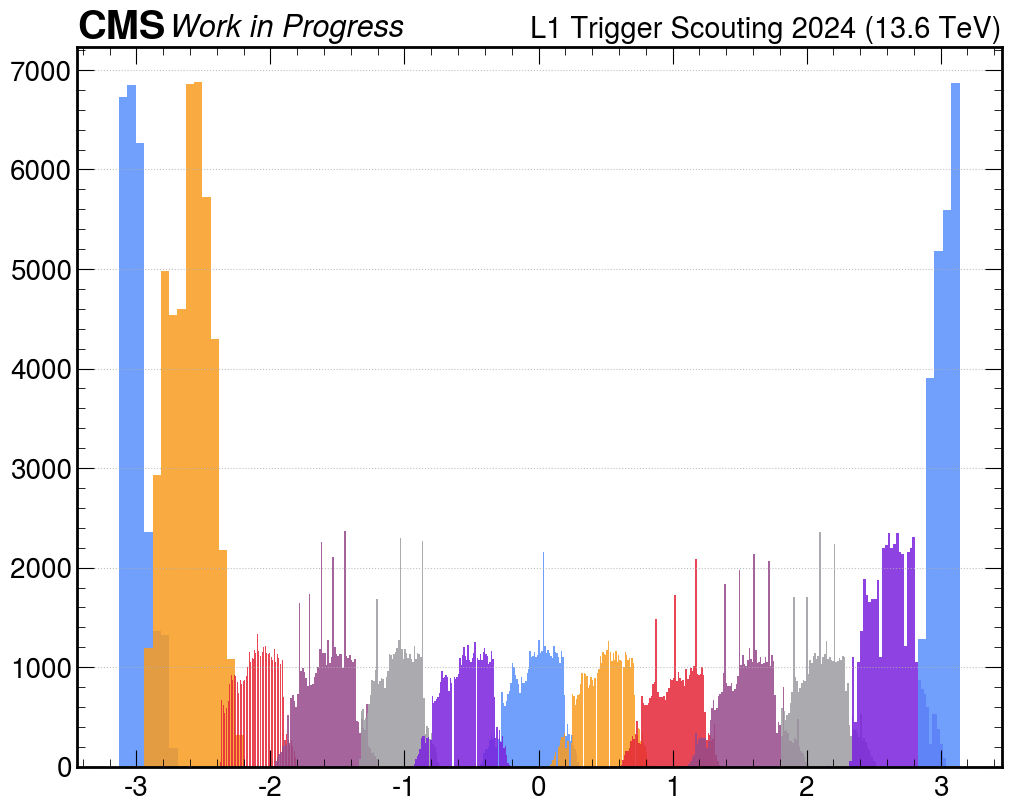

In [18]:
#Distribuzione dei Phi per LS133
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(BmtfPhiDisibutionLS133[0], bins = 100, alpha = 0.85)
ax.hist(BmtfPhiDisibutionLS133[1], bins = 100, alpha = 0.85)
ax.hist(BmtfPhiDisibutionLS133[2], bins = 100, alpha = 0.85)
ax.hist(BmtfPhiDisibutionLS133[3], bins = 100, alpha = 0.85)
ax.hist(BmtfPhiDisibutionLS133[4], bins = 100, alpha = 0.85)
ax.hist(BmtfPhiDisibutionLS133[5], bins = 300, alpha = 0.85)
ax.hist(BmtfPhiDisibutionLS133[6], bins = 100, alpha = 0.85)
ax.hist(BmtfPhiDisibutionLS133[7], bins = 100, alpha = 0.85)
ax.hist(BmtfPhiDisibutionLS133[8], bins = 100, alpha = 0.85)
ax.hist(BmtfPhiDisibutionLS133[9], bins = 100, alpha = 0.85)
ax.hist(BmtfPhiDisibutionLS133[10], bins = 100, alpha = 0.85)
ax.hist(BmtfPhiDisibutionLS133[11], bins = 100, alpha = 0.85)


#ax.set_xlabel('Momento GeV/c')
#ax.set_ylabel('Numero di ricorrenze')
#ax.legend()
#ax.set_xlim(0, 50)
#ax.set_ylim(0, 1000)
ax.grid(visible=True, axis='y')
#ax.set_yscale('log')

In [19]:
#Concatenazione dei 12 array per i 4 file:
BmtfPhiDistribution = ArrayConcatenation(BmtfPhiDisibutionLS133, BmtfPhiDisibutionLS263, BmtfPhiDisibutionLS264, BmtfPhiDisibutionLS306)

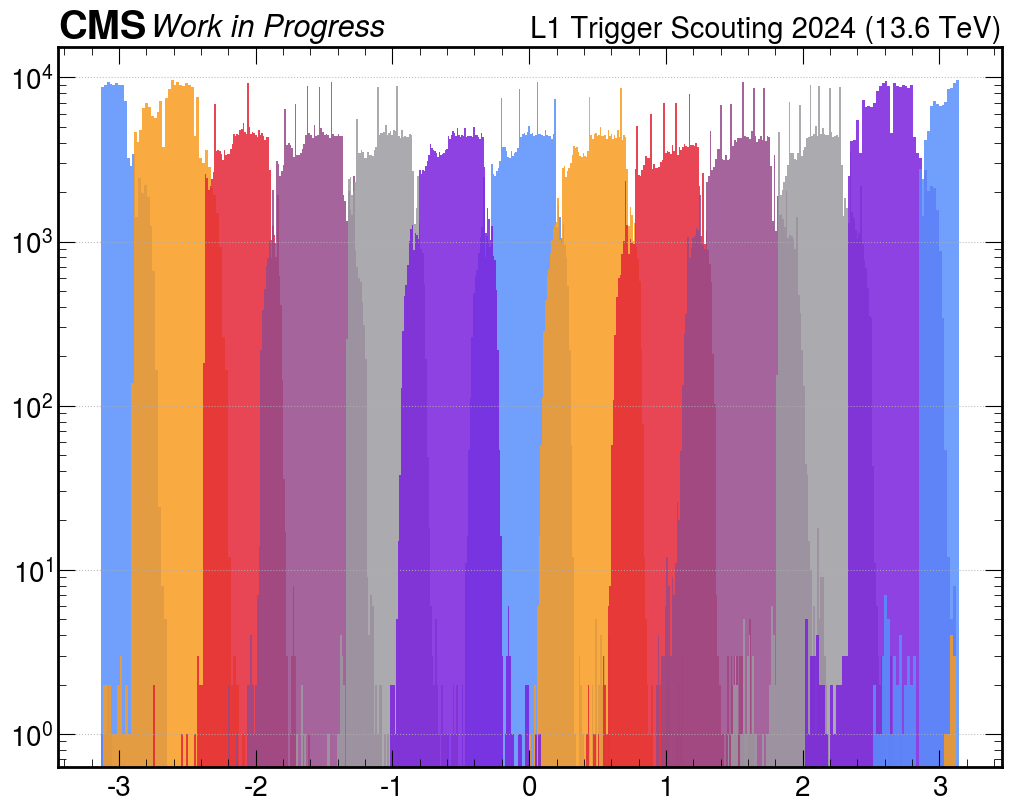

In [28]:
fig, ax = plt.subplots(figsize=FIGSIZE, constrained_layout=True)

set_tick_font(ax, FONTSIZE - 2)
draw_cms_label(ax, fontsize= FONTSIZE, label="Work in Progress", rlabel="L1 Trigger Scouting 2024 (13.6 TeV)")

ax.hist(BmtfPhiDistribution[0], bins = 100, alpha = 0.85)
ax.hist(BmtfPhiDistribution[1], bins = 100, alpha = 0.85)
ax.hist(BmtfPhiDistribution[2], bins = 100, alpha = 0.85)
ax.hist(BmtfPhiDistribution[3], bins = 100, alpha = 0.85)
ax.hist(BmtfPhiDistribution[4], bins = 100, alpha = 0.85)
ax.hist(BmtfPhiDistribution[5], bins = 300, alpha = 0.85)
ax.hist(BmtfPhiDistribution[6], bins = 300, alpha = 0.85)
ax.hist(BmtfPhiDistribution[7], bins = 300, alpha = 0.85)
ax.hist(BmtfPhiDistribution[8], bins = 100, alpha = 0.85)
ax.hist(BmtfPhiDistribution[9], bins = 100, alpha = 0.85)
ax.hist(BmtfPhiDistribution[10], bins = 100, alpha = 0.85)
ax.hist(BmtfPhiDistribution[11], bins = 100, alpha = 0.85)


#ax.set_xlabel('Momento GeV/c')
#ax.set_ylabel('Numero di ricorrenze')
#ax.legend()

ax.grid(visible=True, axis='y')
ax.set_yscale('log')